In [77]:
# Import the relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# set this so the graphs open internally
%matplotlib inline

In [6]:
# Read all the files
# main netflix file
netflix_titles = pd.read_csv("netflix_titles.csv")
# netflix original content files
netflix_original = pd.read_csv("netflix_original_movie_data.csv")
# imdb basic name (title) file
imdb_title_basic = pd.read_csv("title.basics.tsv", sep='\t')
# imdb rating file
imdb_ratings = pd.read_csv("title.ratings.tsv", sep='\t')

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [7]:
netflix_original["original"] = 1

In [8]:
netflix_original

,Unnamed: 0,Title,Directed by,Produced by,Screenplay by,Based on,Starring,Music by,Cinematography,Edited by,...,Indonesian,German,Norwegian,Polish,Music,Lyrics,Book,Basis,Productions,original
0,0,Beasts of No Nation,Cary Joji Fukunaga,Amy Kaufman Cary Joji Fukunaga Daniela Taplin ...,Cary Joji Fukunaga,"['Beasts of No Nation', 'by Uzodinma Iweala']",Idris Elba Abraham Attah Kurt Egyiawan Jude Ak...,Dan Romer,Cary Joji Fukunaga,Mikkel E. G. Nielsen Pete Beaudreau,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,1,The Ridiculous 6,Frank Coraci,Allen Covert Adam Sandler Ted Sarandos,NaN,NaN,Adam Sandler Terry Crews Jorge Garcia Taylor L...,Rupert Gregson-Williams Elmo Weber,Dean Semler,Tom Costain,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,2,"Crouching Tiger, Hidden Dragon: Sword of Destiny",Yuen Woo-ping,Charlie Nguyen Harvey Weinstein,John Fusco,"['Iron Knight, Silver Vase', 'by', 'Wang Dulu']",Donnie Yen Michelle Yeoh,Shigeru Umebayashi,Newton Thomas Sigel,Jeff Betancourt,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,3,Pee-wee's Big Holiday,John Lee,"['Judd Apatow', 'Paul Reubens']",NaN,NaN,"['Paul Reubens', 'Joe Manganiello']",Mark Mothersbaugh,Tim Orr,Jeff Buchanan,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,4,Special Correspondents,Ricky Gervais,Chris Coen Aaron L. Gilbert Ricky Gervais Ted ...,NaN,"['Envoyés très spéciaux', 'by Simon Michaël & ...",Ricky Gervais Eric Bana Vera Farmiga Kevin Pol...,Dickon Hinchliffe,Terry Stacey,Nicolas Chaudeurge,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
518,518,What Did Jack Do?,David Lynch,Sabrina S. Sutherland,NaN,NaN,David Lynch,NaN,Scott Ressler,David Lynch,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
519,519,Road to Roma,Andres Clariond Gabriel Nuncio,NaN,NaN,NaN,Yalitza Aparicio Odín Ayala Eugenio Caballero,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
520,520,Sitara: Let Girls Dream,Sharmeen Obaid-Chinoy,Gloria Steinem,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
521,521,Ben Platt Live from Radio City Musical Hall,Alex Timbers Sam Wrench,Gary Lanvy,NaN,NaN,Ben Platt Crystal Monee Hall Kojo Littles Alle...,NaN,Cameron Barnett Brett Turnbull,Hamish Lyons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [128]:
netflix_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 523 entries, 0 to 522
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            523 non-null    int64  
 1   Title                 521 non-null    object 
 2   Directed by           515 non-null    object 
 3   Produced by           398 non-null    object 
 4   Screenplay by         109 non-null    object 
 5   Based on              99 non-null     object 
 6   Starring              453 non-null    object 
 7   Music by              329 non-null    object 
 8   Cinematography        357 non-null    object 
 9   Edited by             360 non-null    object 
 10  Production companies  125 non-null    object 
 11  Distributed by        506 non-null    object 
 12  Release date          490 non-null    object 
 13  Running time          452 non-null    object 
 14  Country               500 non-null    object 
 15  Language              5

In [9]:
# delete all columns except Title and original
# https://stackoverflow.com/questions/26347412/drop-multiple-columns-in-pandas/26347456
netflix_original.drop(netflix_original.iloc[:, 2:48], inplace=True, axis=1)

In [10]:
netflix_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 523 entries, 0 to 522
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  523 non-null    int64 
 1   Title       521 non-null    object
 2   original    523 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 12.4+ KB


In [11]:
netflix_original.drop(['Unnamed: 0'], inplace=True, axis=1)

In [12]:
netflix_original

,Title,original
0,Beasts of No Nation,1
1,The Ridiculous 6,1
2,"Crouching Tiger, Hidden Dragon: Sword of Destiny",1
3,Pee-wee's Big Holiday,1
4,Special Correspondents,1
...,...,...
518,What Did Jack Do?,1
519,Road to Roma,1
520,Sitara: Let Girls Dream,1
521,Ben Platt Live from Radio City Musical Hall,1


In [13]:
netflix_combined_df = pd.merge(netflix_titles, netflix_original, how="left", left_on="title", \
                               right_on="Title", sort=True, copy=True)

In [14]:
netflix_combined_df['original'] = netflix_combined_df['original'].fillna(0)

In [15]:
netflix_combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7798 entries, 0 to 7797
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       7798 non-null   object 
 1   type          7798 non-null   object 
 2   title         7798 non-null   object 
 3   director      5408 non-null   object 
 4   cast          7078 non-null   object 
 5   country       7291 non-null   object 
 6   date_added    7788 non-null   object 
 7   release_year  7798 non-null   int64  
 8   rating        7791 non-null   object 
 9   duration      7798 non-null   object 
 10  listed_in     7798 non-null   object 
 11  description   7798 non-null   object 
 12  Title         428 non-null    object 
 13  original      7798 non-null   float64
dtypes: float64(1), int64(1), object(12)
memory usage: 913.8+ KB


In [16]:
netflix_combined_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Title,original
0,s28,Movie,#Alive,Cho Il,"Yoo Ah-in, Park Shin-hye",South Korea,"September 8, 2020",2020,TV-MA,99 min,"Horror Movies, International Movies, Thrillers","As a grisly virus rampages a city, a lone man ...",NaN,0.0
1,s29,Movie,#AnneFrank - Parallel Stories,"Sabina Fedeli, Anna Migotto","Helen Mirren, Gengher Gatti",Italy,"July 1, 2020",2019,TV-14,95 min,"Documentaries, International Movies","Through her diary, Anne Frank's story is retol...",NaN,0.0
2,s32,Movie,#FriendButMarried,Rako Prijanto,"Adipati Dolken, Vanesha Prescilla, Rendi Jhon,...",Indonesia,"May 21, 2020",2018,TV-G,102 min,"Dramas, International Movies, Romantic Movies","Pining for his high school crush for years, a ...",NaN,0.0
3,s33,Movie,#FriendButMarried 2,Rako Prijanto,"Adipati Dolken, Mawar de Jongh, Sari Nila, Von...",Indonesia,"June 28, 2020",2020,TV-G,104 min,"Dramas, International Movies, Romantic Movies",As Ayu and Ditto finally transition from best ...,NaN,0.0
4,s35,Movie,#Roxy,Michael Kennedy,"Jake Short, Sarah Fisher, Booboo Stewart, Dann...",Canada,"April 10, 2019",2018,TV-14,105 min,"Comedies, Romantic Movies",A teenage hacker with a huge nose helps a cool...,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7793,s557,TV Show,忍者ハットリくん,NaN,NaN,Japan,"December 23, 2018",2012,TV-Y7,2 Seasons,"Anime Series, Kids' TV","Hailing from the mountains of Iga, Kanzo Hatto...",NaN,0.0
7794,s2083,TV Show,海的儿子,NaN,"Li Nanxing, Christopher Lee, Jesseca Liu, Appl...",NaN,"April 27, 2018",2016,TV-14,1 Season,"International TV Shows, TV Dramas","Two brothers start a new life in Singapore, wh...",NaN,0.0
7795,s3072,TV Show,마녀사냥,NaN,"Si-kyung Sung, Se-yoon Yoo, Dong-yup Shin, Ji-...",South Korea,"February 19, 2018",2015,TV-MA,1 Season,"International TV Shows, Korean TV Shows, Stand...",Four Korean celebrity men and guest stars of b...,NaN,0.0
7796,s2930,Movie,반드시 잡는다,Hong-seon Kim,Baek Yoon-sik,South Korea,"February 28, 2018",2017,TV-MA,110 min,"Dramas, International Movies, Thrillers",After people in his town start turning up dead...,NaN,0.0


In [17]:
netflix_combined_df['show_id'] = netflix_combined_df['show_id'].str[1:]
netflix_combined_df['show_id'] = pd.to_numeric(netflix_combined_df['show_id'])
netflix_combined_df.sort_values(by=['show_id'], ascending=True, inplace=True)

In [18]:
#set show_id as index
netflix_combined_df.set_index('show_id', inplace=True)

In [19]:
netflix_combined_df

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Title,original
show_id,,,,,,,,,,,,,
1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,NaN,0.0
2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,NaN,0.0
3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",NaN,0.0
4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",NaN,0.0
5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,NaN,0.0
7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,NaN,0.0
7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",NaN,0.0


In [54]:
#netflix_combined_df.to_csv("netflix_combined.csv")

In [55]:
#netflix_titles.shape[0]

7787

In [56]:
#netflix_combined_df.shape[0]

7798

In [58]:
#netflix_combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7798 entries, 0 to 7797
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       7798 non-null   object 
 1   type          7798 non-null   object 
 2   title         7798 non-null   object 
 3   director      5408 non-null   object 
 4   cast          7078 non-null   object 
 5   country       7291 non-null   object 
 6   date_added    7788 non-null   object 
 7   release_year  7798 non-null   int64  
 8   rating        7791 non-null   object 
 9   duration      7798 non-null   object 
 10  listed_in     7798 non-null   object 
 11  description   7798 non-null   object 
 12  Title         428 non-null    object 
 13  original      7798 non-null   float64
dtypes: float64(1), int64(1), object(12)
memory usage: 913.8+ KB


In [59]:
#netflix_titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [20]:
netflix_titles.sort_values(by=['title'], ascending=True, inplace=True)

In [30]:
netflix_titles.shape[0]

7787

In [22]:
# how to remove duplicates - https://stackoverflow.com/questions/43698764/removing-rows-with-a-duplicate-column-pandas-dataframe-python
netflix_combined_df.drop_duplicates('title', inplace = True)

In [142]:
# netflix_combined_df.reset_index(inplace=True)

In [23]:
netflix_combined_df.shape[0]

7787

In [24]:
netflix_combined_df

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Title,original
show_id,,,,,,,,,,,,,
1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,NaN,0.0
2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,NaN,0.0
3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",NaN,0.0
4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",NaN,0.0
5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,NaN,0.0
7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,NaN,0.0
7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",NaN,0.0


In [29]:
# merge the imdb datasets
imdb_df = pd.merge(imdb_title_basic, imdb_ratings, how="inner", on="tconst", sort=True, copy=True)

In [31]:
imdb_df.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",5.7,1680
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short",6.0,207
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance",6.5,1417
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short",6.1,122
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short",6.1,2213


In [32]:
# merge the imdb_df to the netflix_combined_df
netflix_df = pd.merge(netflix_combined_df, imdb_df, how="left", left_on="title", right_on="primaryTitle")

In [33]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24012 entries, 0 to 24011
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   type            24012 non-null  object 
 1   title           24012 non-null  object 
 2   director        16378 non-null  object 
 3   cast            22318 non-null  object 
 4   country         22657 non-null  object 
 5   date_added      23950 non-null  object 
 6   release_year    24012 non-null  int64  
 7   rating          24005 non-null  object 
 8   duration        24012 non-null  object 
 9   listed_in       24012 non-null  object 
 10  description     24012 non-null  object 
 11  Title           1527 non-null   object 
 12  original        24012 non-null  float64
 13  tconst          22422 non-null  object 
 14  titleType       22422 non-null  object 
 15  primaryTitle    22422 non-null  object 
 16  originalTitle   22422 non-null  object 
 17  isAdult         22422 non-null 

In [34]:
netflix_df.sample(20)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,...,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
14134,Movie,Raising the Bar,Clay Glen,"Kelli Berglund, Lili Karamalikis, Tess Fowler,...",Australia,"August 1, 2017",2016,TV-Y,97 min,"Children & Family Movies, Dramas, Sports Movies",...,tvEpisode,Raising the Bar,Raising the Bar,0,2003,\N,23,"Adventure,Animation,Comedy",7.2,8.0
23779,Movie,XX,"Jovanka Vuckovic, Annie Clark, Roxanne Benjami...","Natalie Brown, Jonathan Watton, Melanie Lynske...","Canada, United States","June 22, 2017",2017,R,81 min,Horror Movies,...,tvEpisode,XX,XX,0,2017,\N,24,"Animation,Comedy,Documentary",8.1,25.0
13309,Movie,Paradox,Daryl Hannah,"Neil Young, Lukas Nelson, Micah Nelson, Corey ...",United States,"March 23, 2018",2018,TV-MA,74 min,"Dramas, Independent Movies",...,short,Paradox,Paradox,0,2006,\N,19,"Short,Thriller",6.9,712.0
12202,TV Show,My First First Love,NaN,"Ji Soo, Jung Chae-yeon, Jinyoung, Choi Ri, Kan...",South Korea,"July 26, 2019",2019,TV-14,2 Seasons,"International TV Shows, Korean TV Shows, Roman...",...,tvSeries,My First First Love,My First First Love,0,2019,2019,50,Drama,7.6,1370.0
3169,Movie,Burning Sands,Gerard McMurray,"Trevor Jackson, Alfre Woodard, Trevante Rhodes...",United States,"March 10, 2017",2017,TV-MA,102 min,"Dramas, Independent Movies",...,movie,Burning Sands,Burning Sands,0,2017,\N,96,Drama,6.0,2579.0
22163,Movie,To All the Boys: P.S. I Still Love You,Michael Fimognari,"Lana Condor, Noah Centineo, Jordan Fisher, Ann...",United States,"February 12, 2020",2020,TV-14,102 min,"Comedies, Romantic Movies",...,movie,To All the Boys: P.S. I Still Love You,To All the Boys: P.S. I Still Love You,0,2020,\N,101,"Comedy,Drama,Romance",6.0,25916.0
605,Movie,After,Jenny Gage,"Josephine Langford, Hero Fiennes Tiffin, Selma...",United States,"October 9, 2019",2019,PG-13,106 min,"Dramas, Romantic Movies",...,short,After,After,0,1998,\N,24,"Drama,Short",7.4,15.0
4897,Movie,Destiny,Youssef Chahine,"Nour El-Sherif, Laila Elwi, Mahmoud Hemeida, S...","France, Egypt","June 19, 2020",1997,TV-14,136 min,"Dramas, International Movies",...,movie,Destiny,Destiny,0,2010,\N,\N,Action,3.8,12.0
5578,Movie,Elf Pets: Santa’s Reindeer Rescue,Chanda Bell,"Brad Hyland, Drew Barber, Ashley Roberts, Lowr...",United States,"November 1, 2020",2020,TV-Y,27 min,Children & Family Movies,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20196,TV Show,The Miracle,NaN,"Donghyun Kim, Nahyun, Yang Hak Jin, Yoon Hwa Hong",South Korea,"April 10, 2017",2016,TV-14,1 Season,"International TV Shows, Korean TV Shows, TV Dr...",...,movie,The Miracle,Miraklet,0,2013,\N,90,Drama,5.2,74.0


In [36]:
netflix_df.drop_duplicates('title', inplace = True)

In [37]:
netflix_df.shape[0]

7787

In [38]:
netflix_df.to_csv("final_df.csv")

In [39]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7787 entries, 0 to 24011
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   type            7787 non-null   object 
 1   title           7787 non-null   object 
 2   director        5398 non-null   object 
 3   cast            7069 non-null   object 
 4   country         7280 non-null   object 
 5   date_added      7777 non-null   object 
 6   release_year    7787 non-null   int64  
 7   rating          7780 non-null   object 
 8   duration        7787 non-null   object 
 9   listed_in       7787 non-null   object 
 10  description     7787 non-null   object 
 11  Title           417 non-null    object 
 12  original        7787 non-null   float64
 13  tconst          6197 non-null   object 
 14  titleType       6197 non-null   object 
 15  primaryTitle    6197 non-null   object 
 16  originalTitle   6197 non-null   object 
 17  isAdult         6197 non-null   

type
Movie      AxesSubplot(0.125,0.125;0.775x0.755)
TV Show    AxesSubplot(0.125,0.125;0.775x0.755)
Name: averageRating, dtype: object

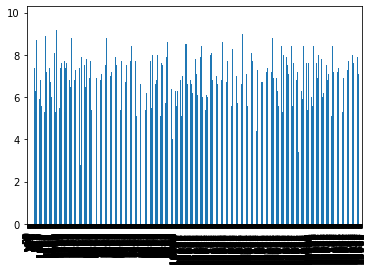

In [47]:
#netflix_df.groupby("type")["averageRating"].plot(kind="bar")

<AxesSubplot:xlabel='type'>

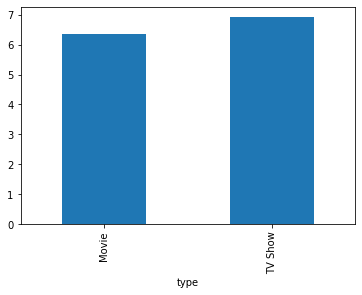

In [48]:
netflix_df.groupby("type")["averageRating"].mean().plot.bar()

<AxesSubplot:xlabel='type'>

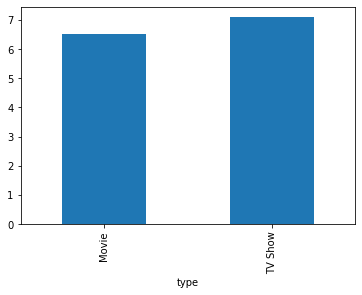

In [50]:
netflix_df.groupby("type")["averageRating"].median().plot.bar()

<AxesSubplot:xlabel='type', ylabel='averageRating'>

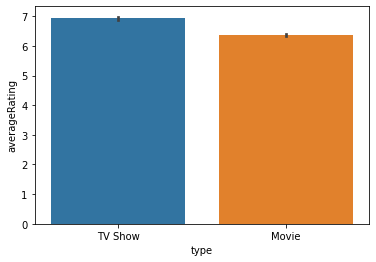

In [52]:
sns.barplot(x='type',y='averageRating',data=netflix_df)

<AxesSubplot:xlabel='type', ylabel='count'>

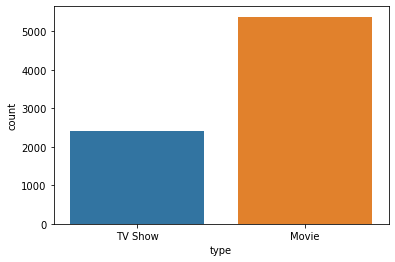

In [55]:
sns.countplot(x='type',data=netflix_df)

<AxesSubplot:xlabel='type', ylabel='averageRating'>

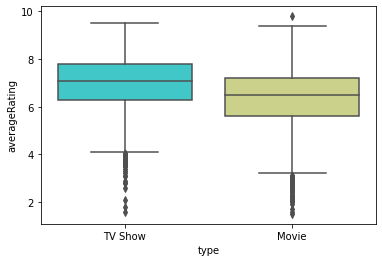

In [60]:
sns.boxplot(x="type", y="averageRating", data=netflix_df, palette='rainbow')

<AxesSubplot:xlabel='type', ylabel='numVotes'>

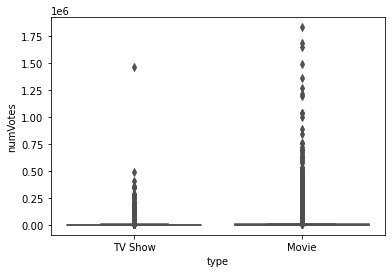

In [61]:
sns.boxplot(x="type", y="numVotes", data=netflix_df, palette='rainbow')

<AxesSubplot:xlabel='type', ylabel='numVotes'>

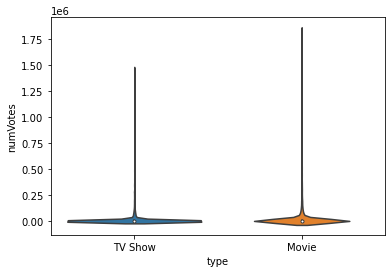

In [62]:
sns.violinplot(x="type", y="numVotes", data=netflix_df)

UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U32'), dtype('<U32')) -> dtype('<U32')

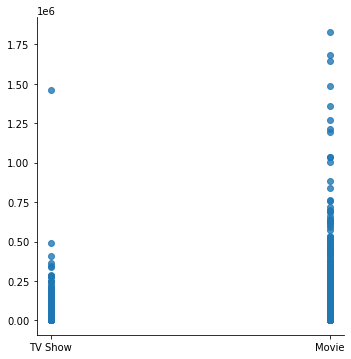

In [63]:
sns.lmplot(x='type',y='numVotes',data=netflix_df)

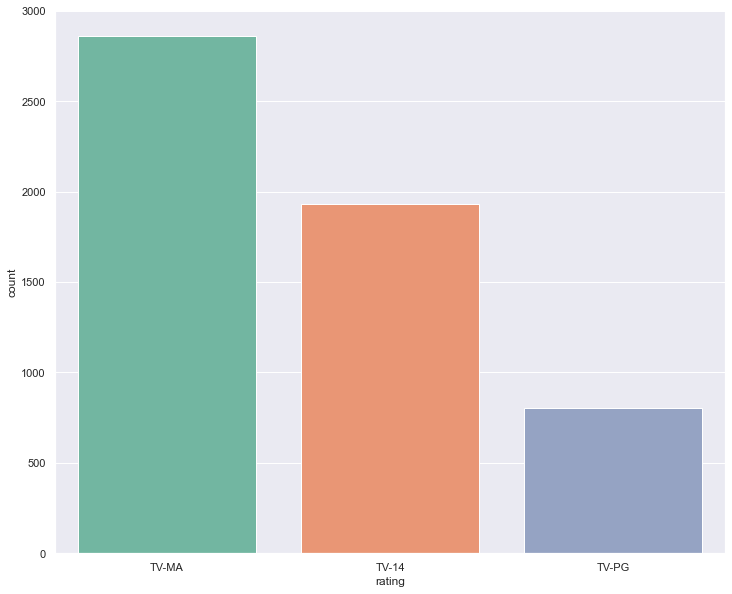

In [68]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(x="rating", data=netflix_df, palette="Set2", order=netflix_df['rating'].value_counts().index[0:3])

<AxesSubplot:xlabel='numVotes', ylabel='count'>

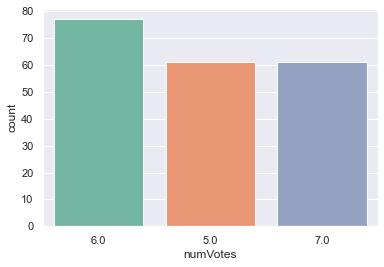

In [70]:
sns.countplot(x="numVotes", data=netflix_df, palette="Set2", order=netflix_df['numVotes'].value_counts().index[0:3])

In [74]:
netflix_df['numVotes'].corr(netflix_df['averageRating'])

0.15567936876944916

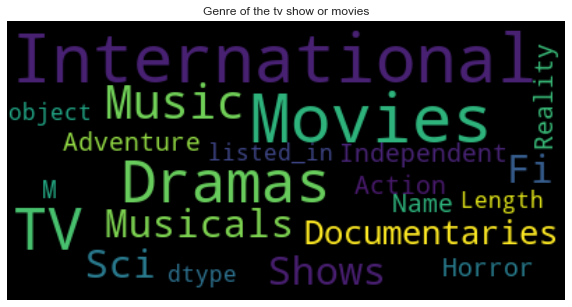

In [78]:
# https://www.kaggle.com/ritikkesharwani/netflix-visualizations
# https://www.datacamp.com/community/tutorials/wordcloud-python
wc = WordCloud(background_color='black',max_words=500)
fig=plt.figure(figsize=(10,6))
wc.generate(str(netflix_df['listed_in']))
plt.imshow(wc, interpolation="bilinear")
plt.title("Genre of the tv show or movies")
plt.axis('off')
plt.show()

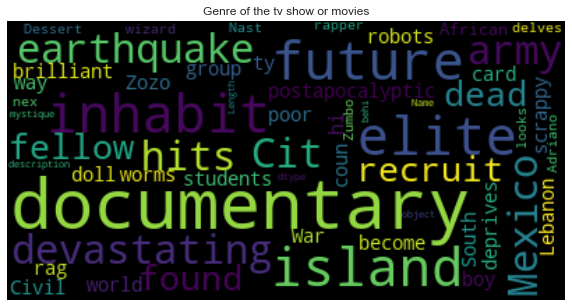

In [79]:
wc = WordCloud(background_color='black',max_words=500)
fig=plt.figure(figsize=(10,6))
wc.generate(str(netflix_df['description']))
plt.imshow(wc, interpolation="bilinear")
plt.title("Genre of the tv show or movies")
plt.axis('off')
plt.show()

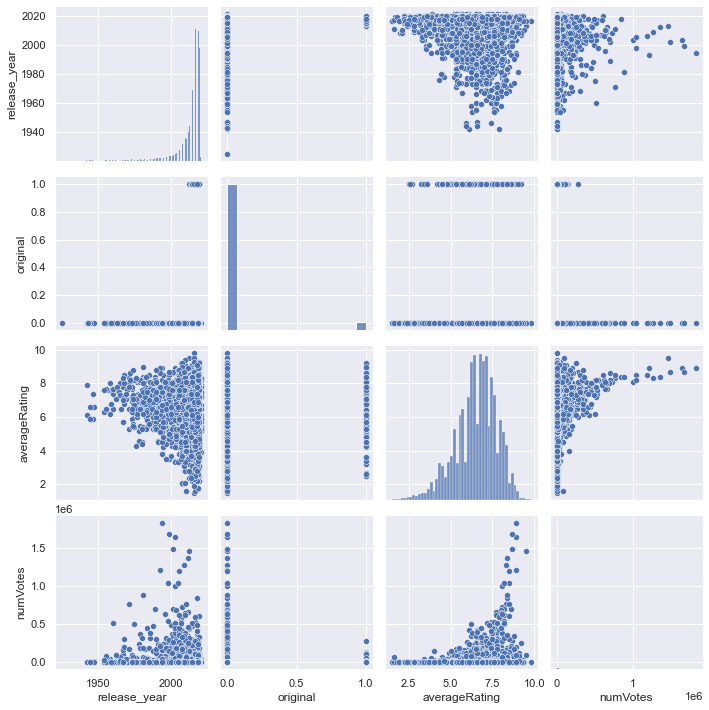

In [81]:
sns.pairplot(netflix_df)

In [ ]:
#sns.jointplot(x='description', y='listed_in', data=netflix_df, kind='reg')

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='averageRating', ylabel='Density'>

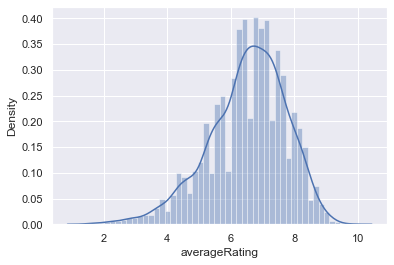

In [83]:
sns.distplot(netflix_df['averageRating'])

<AxesSubplot:xlabel='numVotes'>

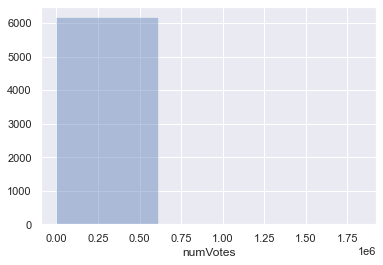

In [87]:
sns.distplot(netflix_df['numVotes'], kde=False, bins=3)

In [ ]:
# https://towardsdatascience.com/analyze-the-data-through-data-visualization-using-seaborn-255e1cd3948e

In [88]:
netflix_df

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,...,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",...,tvMovie,3%,3%,0,2011,\N,27,"Drama,Fantasy,Sci-Fi",7.8,2049.0
2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",...,movie,7:19,7:19,0,2016,\N,94,"Drama,History",6.0,566.0
3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies",...,movie,23:59,23:59,0,2011,\N,78,Horror,4.6,849.0
4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...",...,videoGame,9,9,0,1996,\N,\N,"Adventure,Fantasy,Mystery",6.0,72.0
14,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,...,movie,21,21,0,2000,\N,105,"Comedy,Drama,Romance",7.0,63.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24005,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",...,movie,Zozo,Zozo,0,2005,\N,105,"Drama,Family,War",6.6,3074.0
24007,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",...,movie,Zubaan,Zubaan,0,2015,\N,115,Drama,6.1,387.0
24009,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24010,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",...,tvSeries,Zumbo's Just Desserts,Zumbo's Just Desserts,0,2016,2020,52,Reality-TV,6.9,1863.0


<AxesSubplot:xlabel='averageRating', ylabel='numVotes'>

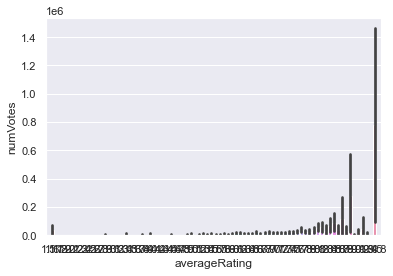

In [91]:
sns.barplot(x='averageRating',y='numVotes',data=netflix_df)

KeyboardInterrupt: 

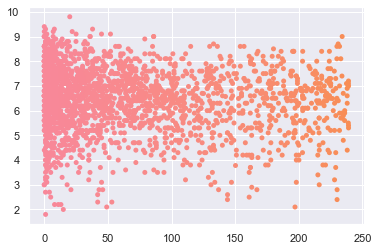

In [93]:
sns.stripplot(x="numVotes", y="averageRating", data=netflix_df)

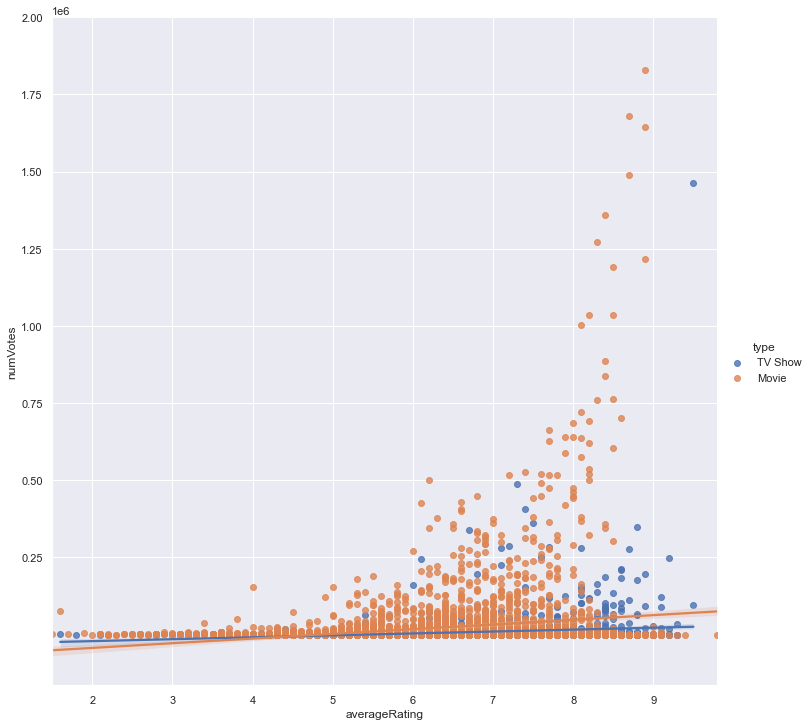

In [110]:
rating_overview = sns.lmplot(x='averageRating',y='numVotes', data=netflix_df, hue="type", height=10)
#rating_overview.set(xlim=(0, 10), ylim=(0, 2000000))
rating_overview.set(yticks=[250000, 500000, 750000, 1000000, 1250000, 1500000, 1750000, 2000000])

In [111]:
smallVotes = netflix_df[netflix_df['numVotes'] < 100]
smallVotes

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,...,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...",...,videoGame,9,9,0,1996,\N,\N,"Adventure,Fantasy,Mystery",6.0,72.0
14,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,...,movie,21,21,0,2000,\N,105,"Comedy,Drama,Romance",7.0,63.0
23,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",...,tvEpisode,46,46,0,1968,\N,28,"Family,Fantasy,Music",8.8,6.0
25,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,TV-MA,95 min,"Horror Movies, International Movies",...,tvEpisode,122,122,0,1968,\N,\N,"Family,Fantasy,Music",8.0,5.0
35,TV Show,1983,NaN,"Robert Więckiewicz, Maciej Musiał, Michalina O...","Poland, United States","November 30, 2018",2018,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas",...,tvEpisode,1983,1983,0,2019,\N,\N,Music,8.6,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23953,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers",...,tvSeries,Zodiac,Zodiac,0,1974,\N,60,"Comedy,Drama",6.6,57.0
23961,TV Show,Zoids Wild,NaN,"Kensho Ono, Takahiro Sakurai, Mikako Komatsu, ...",Japan,"August 14, 2020",2018,TV-Y7,1 Season,"Anime Series, Kids' TV",...,tvSeries,Zoids Wild,Zoids Wild,0,2018,\N,\N,Animation,6.2,10.0
23963,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies",...,tvSeries,Zombie Dumb,Zombie Dumb,0,2019,\N,\N,"Adventure,Animation,Comedy",5.7,12.0
23964,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",...,tvEpisode,Zombieland,Zombieland,0,2019,\N,\N,Comedy,7.6,31.0


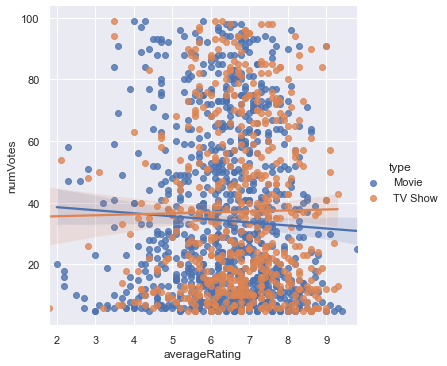

In [115]:
sns.lmplot(x='averageRating',y='numVotes', data=smallVotes, hue="type", height=5)

In [116]:
bigVotes = netflix_df[netflix_df['numVotes'] > 100]
bigVotes

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,...,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",...,tvMovie,3%,3%,0,2011,\N,27,"Drama,Fantasy,Sci-Fi",7.8,2049.0
2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",...,movie,7:19,7:19,0,2016,\N,94,"Drama,History",6.0,566.0
3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies",...,movie,23:59,23:59,0,2011,\N,78,Horror,4.6,849.0
29,Movie,706,Shravan Kumar,"Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...",India,"April 1, 2019",2019,TV-14,118 min,"Horror Movies, International Movies",...,movie,706,706,0,2019,\N,120,Thriller,5.3,403.0
30,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,"December 15, 2017",2008,TV-MA,143 min,"Horror Movies, International Movies, Thrillers",...,movie,1920,1920,0,2008,\N,138,"Horror,Mystery,Romance",6.4,2960.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23969,Movie,Zoo,Shlok Sharma,"Shashank Arora, Shweta Tripathi, Rahul Kumar, ...",India,"July 1, 2018",2018,TV-MA,94 min,"Dramas, Independent Movies, International Movies",...,short,Zoo,Zoo,0,1961,\N,10,"Documentary,Short",7.4,474.0
23992,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies",...,tvSeries,Zoom,Zoom,0,1972,1978,\N,"Comedy,Drama,Family",7.6,304.0
24005,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",...,movie,Zozo,Zozo,0,2005,\N,105,"Drama,Family,War",6.6,3074.0
24007,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",...,movie,Zubaan,Zubaan,0,2015,\N,115,Drama,6.1,387.0


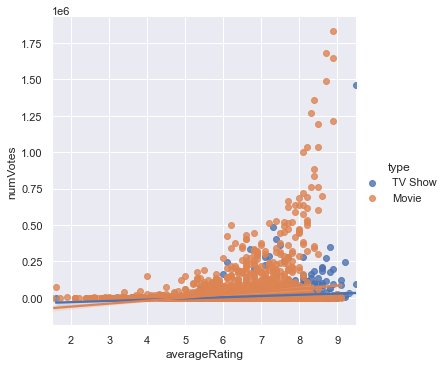

In [117]:
sns.lmplot(x='averageRating',y='numVotes', data=bigVotes, hue="type", height=5)